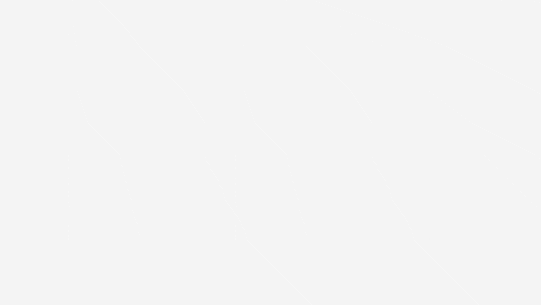

# How does the W-boson decay?
This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to measure the W-boson decay branching ratios yourself!

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text

The idea is that you go through the tasks at the bottom to measure the W-boson decay branching ratios.

By the end of this notebook you will be able to:
1. measure the W-boson decay branching ratio yourself!
2. know some general principles of particle physics analysis

The datasets used in this notebook have already been filtered [by this notebook](), so that processing is quicker.

Contents: 

[Instructions](#instructions) <br />
[Running a Jupyter notebook](#running) <br />
[To setup everytime](#setup_everytime) <br />
[Fraction of data used](#fraction) <br />
[Samples to process](#samples) <br />
[Invariant mass calculation](#invariant_mass) <br />
[Jet selection](#jet_selection) <br />
[Lep selection](#lep_selection) <br />
[Branching ratio](#BR) <br />

<a id='instructions'></a>

## Instructions

1. Fill in the missing pieces in the ['Invariant mass calculation' code cell](#invariant_mass)
2. In the ['Lepton selection' cell](#lep_selection), fill in the code line to select events with 1 additional lepton. Use the command to keep 0 additional leptons in the ['Jet selection' cell](#jet_selection) to help you.
3. In the top menu, Run -> Run All
4. What's the ratio of events passing the jet selection to lepton selection?
5. What does this say about the branching ratio of a W decay to jets and W decay to leptons?
6. Estimate the error on your measurement.
7. Bonus: Could your measurement improve if you increase the fraction of data you use [here](#fraction)?
8. Bonus: Could your measurement improve if you use more data samples [here](#samples)?


<a id='running'></a>

## Running a Jupyter notebook

To run the whole Jupyter notebook, in the top menu click Run -> Run all.

To propagate a change you've made to a piece of code, click Run -> Run after.

You can also run a single code cell, by using the keyboard shortcut Shift+Enter.

<a id='setup_everytime'></a>

## To setup everytime

to be done every time you re-open this notebook

We're going to be using a number of tools to help us:
* pandas: lets us store data as dataframes, a format widely used in python
* numpy: provides numerical calculations such as histogramming

In [ ]:
import pandas as pd # to store data as dataframe
import numpy as np # # for numerical calculations such as histogramming

<a id='fraction'></a>

## Fraction of data used

In [ ]:
fraction = 0.01 # reduce this is you want the code to run quicker

<a id='samples'></a>

## Samples to process.

data_A + data_B + data_C + data_D is about 1/3 of the data collected by ATLAS in 2016 at 13 TeV.

dataEgamma + dataMuons is about 1/20 of the data collected by ATLAS in 2012 at 8 TeV.

In [ ]:
samples = ['data_A']
#samples_list = ['data_A','data_B','data_C','data_D','dataEgamma','dataMuons'] # more data can be added like this

Define function to get data from files

In [ ]:
# get data from files

DataFrame = pd.DataFrame() # define empty dataframe
for s in samples: # loop over samples
    path_to_csv = '/kaggle/input/wbranchingratio/'+s+'.csv'
    total_rows = sum(1 for line in open(path_to_csv)) - 1 #number of records in file (excludes header)
    num_rows_to_read = int(fraction*total_rows)
    DataFrame = DataFrame.append(pd.read_csv(path_to_csv, nrows=num_rows_to_read)) # read .csv file

<a id='invariant_mass'></a>

## Invariant mass

1. If the energy of the 2 jets are *E[0]* and *E[1]*, write the sum of energy, *sumE*
2. Write the x-momentum of jet[1], *px_1*, using the definition of x-momentum of jet[0] x-momentum, *px_0*, written for you. All you need to do is replace 0 with 1
3. Do the same for y and z momenta of jet[1] (*py_1* and *pz_1*)
4. Write the sum of x-momentum, *sumpx*
5. Do the same for y and z momenta (*sumpy* and *sumpz*)
6. Write the magnitude of total momentum, *sump*

The invariant mass *M* of a parent particle decaying to two daughter particles is related to properties of the daughter particles by the formula:

$$M^2=E^2-p^2,$$

where *E* is the total energy of the daughter particles, and *p* is the magnitude of the vector sum of the momenta of the daughter particles.

7. Write *M* using this formula for invariant mass

In [ ]:
def calc_inv_mass(pt,eta,phi,E):
    pt = [float(pt_i) for pt_i in pt.strip('[]').split()] # get list of pt floats
    eta = [float(eta_i) for eta_i in eta.strip('[]').split()] # get list of eta floats
    phi = [float(phi_i) for phi_i in phi.strip('[]').split()] # get list of phi floats
    E = [float(E_i) for E_i in E.strip('[]').split()] # get list of E floats
    # first jet is [0], 2nd jet is [1] etc
    
    # sumE = sum of energy
    sumE = E[0] + E[1]
    
    px_0 = pt[0]*np.cos(phi[0]) # x-momentum of [0]
    # px_1 = x-momentum of [1]
    px_1 = pt[1]*np.cos(phi[1])
    
    py_0 = pt[0]*np.sin(phi[0]) # y-momentum of [0]
    # py_1 = y-momentum of [1]
    py_1 = pt[1]*np.sin(phi[1])
    
    pz_0 = pt[0]*np.sinh(eta[0]) # z-momentum of [0]
    # pz_1 = z-momentum of [1]
    pz_1 = pt[1]*np.sinh(eta[1])
    
    # sumpx = sum of x-momenta
    sumpx = px_0 + px_1
    
    # sumpy = sum of y-momenta
    sumpy = py_0 + py_1
    
    # sumpz = sum of z-momenta
    sumpz = pz_0 + pz_1
    
    # sump = magnitude of total momentum
    sump = 
    
    # myy = invariant mass from M^2 = E^2 - p^2
    M = np.sqrt(sumE**2 - sump**2)
    
    return M

<a id='jet_selection'></a>

## Jet selection

Get the data passing the selection asking for 2 jets with an invariant mass between 70 and 90 GeV, and no additional leptons.

In [ ]:
jet_DataFrame = DataFrame[ DataFrame['boson_lep_n']==0 ] # keep events with 0 boson leptons
jet_DataFrame = jet_DataFrame[ jet_DataFrame['jet_n']==2 ] # keep events with 2 jets


# calculate invariant mass of jet pair
jet_DataFrame['mjj'] = np.vectorize(calc_inv_mass)(jet_DataFrame.jet_pt,
                                                   jet_DataFrame.jet_eta,
                                                   jet_DataFrame.jet_phi,
                                                   jet_DataFrame.jet_E)

# keep events with jet-pair invariant mass within 10000 MeV of W boson mass
jet_DataFrame = jet_DataFrame[(jet_DataFrame['mjj']>70000) & (jet_DataFrame['mjj']<90000)]

jet_DataFrame # print data

<a id='lep_selection'></a>

## Lepton selection

1. Fill in the code line to select events with 1 additional lepton. Use the command to keep 0 additional leptons in the ['Jet selection' cell](#jet_selection) to help you. 

In [ ]:
# keep events with 1 boson lepton
lep_DataFrame = DataFrame [ DataFrame['boson_lep_n']==1 ]

lep_DataFrame # print data

<a id='BR'></a>

How many jet events and how many lepton events?

In [ ]:
len(jet_DataFrame)/len(lep_DataFrame)

[Back to instructions](#instructions)